Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

MOUNT DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


SET UP IMAGE DATA GENERATORS FOR TRAINING, TESTING AND VALIDATION

In [ ]:
train ='/content/drive/My Drive/train'
test = '/content/drive/My Drive/test'
val = '/content/drive/My Drive/val'
img_height, img_width = 224, 224  # You can adjust based on your images
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
test_gen = test_datagen.flow_from_directory(test, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 1377 images belonging to 5 classes.
Found 457 images belonging to 5 classes.
Found 465 images belonging to 5 classes.


In [ ]:
# Create the ImageDataGenerator and load the data
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)

train_gen = train_datagen.flow_from_directory(
    train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# 1. Checking class indices
print("Class Indices:")
print(train_gen.class_indices)

# 2. Manually counting images per class
print("\nCounting images in each class:")
class_counts = {class_name: 0 for class_name in train_gen.class_indices.keys()}  # Initialize a dictionary for class counts

# Loop through the directory and count the images in each class
for class_name in os.listdir(train):
    class_path = os.path.join(train, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

print(class_counts)

Found 1377 images belonging to 5 classes.
Class Indices:
{'Canker': 0, 'Dot': 1, 'Healthy': 2, 'Mummification': 3, 'Rust': 4}

Counting images in each class:
{'Canker': 166, 'Dot': 106, 'Healthy': 773, 'Mummification': 165, 'Rust': 167}


Define a Simple CNN Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

 Train the Model

In [ ]:
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 8/44 ━━━━━━━━━━━━━━━━━━━━ 6:31 11s/step - accuracy: 0.4539 - loss: 1.6919

Evaluate on Test Data

In [ ]:
test_loss, test_acc = model.evaluate(test_gen)
print(f'Test accuracy: {test_acc:.2f}')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.1818 - loss: 1.6108
Test accuracy: 0.24


Save the Model

In [ ]:
model.save('/content/drive/My Drive/guava_leaf_model.h5')

 Saving Model Weights

In [ ]:
model.save_weights('/content/drive/My Drive/guava_leaf_model.weights.h5')

Loading Saved Weights

In [ ]:
# Now load the saved weights into the model
model.load_weights('/content/drive/My Drive/guava_leaf_model.weights.h5')


New Self Check

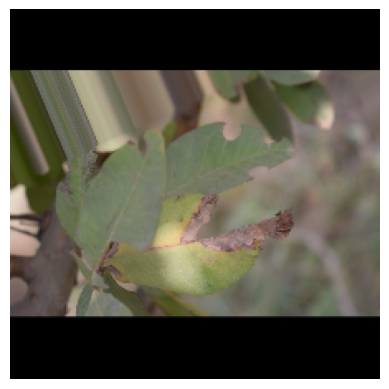

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Predicted Disease: HEALTHY


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('/content/drive/My Drive/guava_leaf_model.h5')

# Read the image from disk
img = cv2.imread('/content/drive/MyDrive/val/Healthy/test_0_1134.jpeg')

# Convert the image from BGR (OpenCV) to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image to match the model input size (e.g., 224x224)
img = cv2.resize(img, (224, 224))

# Show the image to make sure it looks correct
plt.imshow(img)
plt.axis('off')
plt.show()

# Normalize the image (scale pixel values to [0, 1])
img = img / 255.0

# Reshape the image to match the model's input shape (batch size, height, width, channels)
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img)

# Get the predicted class (if model has softmax, this will give probabilities)
predicted_class = np.argmax(prediction)

# If you have class labels, map the prediction to a label
class_labels = ['CANKER', 'DOT', 'HEALTHY', 'MUMMIFICATION', 'RUST']  # Replace with your class labels
predicted_label = class_labels[predicted_class]

# Print the result
print(f"Predicted Disease: {predicted_label}")


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt

# Load model and class names
model = load_model('/content/drive/My Drive/guava_leaf_model.h5')
class_names = ["Canker", "Dot", "Healthy", "Mummification", "Rust"]

# Global CSS Styling
display(HTML('''
<style>
h1, h2, h3, h4, p {
    font-family: 'Poppins', 'Segoe UI', sans-serif;
    color: #1b1b1b;
}
.button-custom {
    background: linear-gradient(90deg, #0078D7, #0056b3);
    color: white;
    font-size: 16px;
    font-weight: bold;
    border: none;
    border-radius: 8px;
    padding: 12px 24px;
    cursor: pointer;
    transition: 0.3s;
}
.button-custom:hover {
    background: linear-gradient(90deg, #0056b3, #0078D7);
}
.upload-area {
    border: 3px dashed #0078D7;
    padding: 30px;
    background: #eef6fb;
    border-radius: 16px;
    margin-top: 30px;
}
.prediction-box {
    margin-top: 20px;
    padding: 20px;
    border-radius: 12px;
    font-size: 20px;
    text-align: center;
}
.pred-healthy {
    background-color: #28a745;
    color: white;
}
.pred-disease {
    background-color: #dc3545;
    color: white;
}
.footer {
    text-align: center;
    font-size: 14px;
    color: #777;
    margin-top: 40px;
}
</style>
'''))

# --- Home Page ---
home_title = widgets.HTML('''
    <h1 style="text-align:center; font-size:52px; line-height:1.4; margin-bottom:10px;">
        🍃 Guava Leaf<br>Disease Detector
    </h1>
''')

home_description = widgets.HTML('''
    <p style="text-align:center; font-size:18px; color:#333; max-width:750px; margin:auto; line-height:1.8;">
        Welcome to the Guava Leaf Disease Detection App!<br><br>
        It identifies diseases like <b>Canker</b>, <b>Dot</b>, <b>Mummification</b>, <b>Rust</b>, and <b>Healthy</b> leaves with high precision using Deep Learning.<br><br>
        Let's get started!
    </p>
''')

start_button = widgets.Button(description="🚀 Start Diagnosis", layout=widgets.Layout(width="250px", height="55px"))
start_button.add_class("button-custom")

# Upload & Predict Page
file_upload = widgets.FileUpload(
    accept="image/*", multiple=False,
    layout=widgets.Layout(width='100%', height='120px')
)

diagnose_button = widgets.Button(description="🩺 Diagnose", layout=widgets.Layout(width="220px", height="50px"))
diagnose_button.add_class("button-custom")

back_button = widgets.Button(description="⬅️ Back", layout=widgets.Layout(width="200px", height="50px"))
back_button.add_class("button-custom")

upload_output = widgets.Output()

# Prediction logic
def predict_leaf_disease(image):
    image = image.resize((224, 224))
    img_array = img_to_array(image) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    preds = model.predict(img_array)
    return preds

# Diagnose button click
def on_diagnose_click(b):
    with upload_output:
        clear_output()
        if not file_upload.value:
            display(HTML("<div style='color:#dc3545; text-align:center;'><b>⚠️ Please upload an image first!</b></div>"))
            return

        uploaded_file = next(iter(file_upload.value.values()))
        content = uploaded_file['content']
        image = Image.open(io.BytesIO(content)).convert('RGB')

        display(HTML("<h4 style='text-align:center; color:#0078D7;'>⏳ Diagnosing, please wait...</h4>"))

        preds = predict_leaf_disease(image)
        predicted_class = class_names[np.argmax(preds)]
        confidence = np.max(preds)

        display(HTML("<h4 style='text-align:center; color:#1b1b1b;'>Uploaded Leaf:</h4>"))
        display(image.resize((300, 300)))

        # Result box
        box_class = "pred-healthy" if predicted_class == "Healthy" else "pred-disease"
        prediction_html = f"""
        <div class='prediction-box {box_class}'>
            🔍 <b>Prediction:</b> {predicted_class}<br>
            🎯 <b>Confidence:</b> {confidence*100:.2f}%
        </div>
        """
        display(HTML(prediction_html))

        # Plot probabilities
        fig, ax = plt.subplots(figsize=(8, 4))
        ax.bar(class_names, preds[0], color="#0078D7")
        ax.set_ylim(0, 1)
        ax.set_ylabel("Confidence", color="#333")
        ax.set_title("Prediction Confidence", fontsize=14, color="#333")
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()

diagnose_button.on_click(on_diagnose_click)

# Layout container
app_container = widgets.VBox()

def show_home():
    upload_output.clear_output()
    app_container.children = [
        home_title,
        home_description,
        widgets.HBox([start_button], layout=widgets.Layout(justify_content="center", padding="20px")),
        widgets.HTML('<div class="footer">Made with ❤️ by <b>AGROCARE INDIA</b></div>')
    ]

def show_upload_page():
    upload_output.clear_output()

    upload_box = widgets.VBox([
        widgets.HTML('<h3 style="text-align:center; color:#0078D7;">📤 Upload a Guava Leaf Image</h3>'),
        file_upload,
        widgets.HBox([diagnose_button], layout=widgets.Layout(justify_content="center", padding="10px")),
        upload_output
    ], layout=widgets.Layout(
        width='100%',
        padding='20px',
        border='3px dashed #0078D7',
        background_color='#eef6fb',
        border_radius='16px',
        margin='auto'
    ))

    app_container.children = [
        widgets.HBox([back_button], layout=widgets.Layout(justify_content="flex-start", padding="10px")),
        upload_box,
        widgets.HTML('<div class="footer">Made with ❤️ by <b>AGROCARE INDIA</b></div>')
    ]

start_button.on_click(lambda b: show_upload_page())
back_button.on_click(lambda b: show_home())

# Launch Home page
show_home()
display(app_container)
